In [1]:
import pandas  as pd
from tqdm.notebook import tqdm 
import itertools as it
pd.options.display.max_colwidth = 1000
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

In [2]:
df = pd.read_json("easy_training_2.json")

In [3]:
df

,context,questions,ans
0,"Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles ""Crazy in Love"" and ""Baby Boy"".","[When did Beyonce start becoming popular?, What areas did Beyonce compete in when she was growing up?, When did Beyonce leave Destiny's Child and become a solo singer?, In what city and state did Beyonce grow up? , In which decade did Beyonce become famous?, In what R&B group was she the lead singer?, What album made her a worldwide known artist?, Who managed the Destiny's Child group?, When did Beyoncé rise to fame?, What role did Beyoncé have in Destiny's Child?, What was the first album Beyoncé released as a solo artist?, When did Beyoncé release Dangerously in Love?, How many Grammy awards did Beyoncé win for her first solo album?, What was Beyoncé's role in Destiny's Child?, What was the name of Beyoncé's first solo album?]","[None, in the late 1990s, None, singing and dancing, None, 2003, None, Houston, Texas, None, late 1990s, None, Destiny's Child, None, Dangerously in Love, None, Mathew Knowles, None, late 1990s, None, lead singer, None, Dangerously in Love, None, 2003, None, five, None, lead singer, None, Dangerously in Love]"
1,"Following the disbandment of Destiny's Child in June 2005, she released her second solo album, B'Day (2006), which contained hits ""Déjà Vu"", ""Irreplaceable"", and ""Beautiful Liar"". Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and starring roles in The Pink Panther (2006) and Obsessed (2009). Her marriage to rapper Jay Z and portrayal of Etta James in Cadillac Records (2008) influenced her third album, I Am... Sasha Fierce (2008), which saw the birth of her alter-ego Sasha Fierce and earned a record-setting six Grammy Awards in 2010, including Song of the Year for ""Single Ladies (Put a Ring on It)"". Beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul. Her critically acclaimed fifth studio album, Beyoncé (2013), was distinguished from previous releases by its experimental production and explorati...","[After her second solo album, what other entertainment venture did Beyonce explore?, Which artist did Beyonce marry?, To set the record for Grammys, how many did Beyonce win?, For what movie did Beyonce receive her first Golden Globe nomination?, When did Beyonce take a hiatus in her career and take control of her management?, Which album was darker in tone from her previous work?, After what movie portraying Etta James, did Beyonce create Sasha Fierce?, When did Destiny's Child end their group act?, What was the name of Beyoncé's second solo album?, What was Beyoncé's first acting job, in 2006?, Who is Beyoncé married to?, What is the name of Beyoncé's alter-ego?]","[None, acting, None, Jay Z, None, six, None, Dreamgirls, None, 2010, None, Beyoncé, None, Cadillac Records, None, June 2005, None, B'Day, None, Dreamgirls, None, Jay Z, None, Sasha Fierce]"
2,"A self-described ""modern-day feminist"", Beyoncé creates songs that are often characterized by themes of love, relationships, and monogamy, as well as female sexuality and empowerment. On stage, her dynamic, highly choreographed performances have led to critics hailing her as one of the best entertainers in contemporary popular music. 

In [4]:
df['context']=df.apply(lambda x: x['context'].lower(),axis=1)

In [5]:
df['questions']=df.apply(lambda x:[i.lower() for i in x['questions']],axis=1)

In [6]:
df['ans']=df['ans'].apply(lambda x:[i for i in x if i is not None])

In [7]:
df['ans'] = df.apply(lambda x: [i.lower() for i in x['ans']], axis=1)

In [8]:
df

,context,questions,ans
0,"beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r&b girl-group destiny's child. managed by her father, mathew knowles, the group became one of the world's best-selling girl groups of all time. their hiatus saw the release of beyoncé's debut album, dangerously in love (2003), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number-one singles ""crazy in love"" and ""baby boy"".","[when did beyonce start becoming popular?, what areas did beyonce compete in when she was growing up?, when did beyonce leave destiny's child and become a solo singer?, in what city and state did beyonce grow up? , in which decade did beyonce become famous?, in what r&b group was she the lead singer?, what album made her a worldwide known artist?, who managed the destiny's child group?, when did beyoncé rise to fame?, what role did beyoncé have in destiny's child?, what was the first album beyoncé released as a solo artist?, when did beyoncé release dangerously in love?, how many grammy awards did beyoncé win for her first solo album?, what was beyoncé's role in destiny's child?, what was the name of beyoncé's first solo album?]","[in the late 1990s, singing and dancing, 2003, houston, texas, late 1990s, destiny's child, dangerously in love, mathew knowles, late 1990s, lead singer, dangerously in love, 2003, five, lead singer, dangerously in love]"
1,"following the disbandment of destiny's child in june 2005, she released her second solo album, b'day (2006), which contained hits ""déjà vu"", ""irreplaceable"", and ""beautiful liar"". beyoncé also ventured into acting, with a golden globe-nominated performance in dreamgirls (2006), and starring roles in the pink panther (2006) and obsessed (2009). her marriage to rapper jay z and portrayal of etta james in cadillac records (2008) influenced her third album, i am... sasha fierce (2008), which saw the birth of her alter-ego sasha fierce and earned a record-setting six grammy awards in 2010, including song of the year for ""single ladies (put a ring on it)"". beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul. her critically acclaimed fifth studio album, beyoncé (2013), was distinguished from previous releases by its experimental production and explorati...","[after her second solo album, what other entertainment venture did beyonce explore?, which artist did beyonce marry?, to set the record for grammys, how many did beyonce win?, for what movie did beyonce receive her first golden globe nomination?, when did beyonce take a hiatus in her career and take control of her management?, which album was darker in tone from her previous work?, after what movie portraying etta james, did beyonce create sasha fierce?, when did destiny's child end their group act?, what was the name of beyoncé's second solo album?, what was beyoncé's first acting job, in 2006?, who is beyoncé married to?, what is the name of beyoncé's alter-ego?]","[acting, jay z, six, dreamgirls, 2010, beyoncé, cadillac records, june 2005, b'day, dreamgirls, jay z, sasha fierce]"
2,"a self-described ""modern-day feminist"", beyoncé creates songs that are often characterized by themes of love, relationships, and monogamy, as well as female sexuality and empowerment. on stage, her dynamic, highly choreographed performances have led to critics hailing her as one of the best entertainers in contemporary popular music. throughout a career spanning 19 years, she has sold over 118 million records as a solo artist, and a further 60 million with destiny's child, making her one of th

Arreglo de oraciones por contexto

In [9]:
df['context']=df['context'].apply(lambda x: x.split('.'))

In [10]:
df=df.applymap(lambda x: list(filter(('').__ne__, x)))

In [11]:
df

,context,questions,ans
0,"[beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) is an american singer, songwriter, record producer and actress, born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r&b girl-group destiny's child, managed by her father, mathew knowles, the group became one of the world's best-selling girl groups of all time, their hiatus saw the release of beyoncé's debut album, dangerously in love (2003), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number-one singles ""crazy in love"" and ""baby boy""]","[when did beyonce start becoming popular?, what areas did beyonce compete in when she was growing up?, when did beyonce leave destiny's child and become a solo singer?, in what city and state did beyonce grow up? , in which decade did beyonce become famous?, in what r&b group was she the lead singer?, what album made her a worldwide known artist?, who managed the destiny's child group?, when did beyoncé rise to fame?, what role did beyoncé have in destiny's child?, what was the first album beyoncé released as a solo artist?, when did beyoncé release dangerously in love?, how many grammy awards did beyoncé win for her first solo album?, what was beyoncé's role in destiny's child?, what was the name of beyoncé's first solo album?]","[in the late 1990s, singing and dancing, 2003, houston, texas, late 1990s, destiny's child, dangerously in love, mathew knowles, late 1990s, lead singer, dangerously in love, 2003, five, lead singer, dangerously in love]"
1,"[following the disbandment of destiny's child in june 2005, she released her second solo album, b'day (2006), which contained hits ""déjà vu"", ""irreplaceable"", and ""beautiful liar"", beyoncé also ventured into acting, with a golden globe-nominated performance in dreamgirls (2006), and starring roles in the pink panther (2006) and obsessed (2009), her marriage to rapper jay z and portrayal of etta james in cadillac records (2008) influenced her third album, i am, sasha fierce (2008), which saw the birth of her alter-ego sasha fierce and earned a record-setting six grammy awards in 2010, including song of the year for ""single ladies (put a ring on it)"", beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul, her critically acclaimed fifth studio album, beyoncé (2013), was distinguished from previous releases by its experimental production and explo...","[after her second solo album, what other entertainment venture did beyonce explore?, which artist did beyonce marry?, to set the record for grammys, how many did beyonce win?, for what movie did beyonce receive her first golden globe nomination?, when did beyonce take a hiatus in her career and take control of her management?, which album was darker in tone from her previous work?, after what movie portraying etta james, did beyonce create sasha fierce?, when did destiny's child end their group act?, what was the name of beyoncé's second solo album?, what was beyoncé's first acting job, in 2006?, who is beyoncé married to?, what is the name of beyoncé's alter-ego?]","[acting, jay z, six, dreamgirls, 2010, beyoncé, cadillac records, june 2005, b'day, dreamgirls, jay z, sasha fierce]"
2,"[a self-described ""modern-day feminist"", beyoncé creates songs that are often characterized by themes of love, relationships, and monogamy, as well as female sexuality and empowerment, on stage, her dynamic, highly choreographed performances have led to critics hailing her as one of the best entertainers in contemporary popular music, throughout a career spanning 19 years, she has sold over 118 million records as a solo artist, and a further 60 million with destiny's child, making her one of the b

In [12]:
archivo=open("stopwords.txt","r")
wor=archivo.read()
archivo.close()

words=wor.split("\n")

In [13]:
def remove_stopwords(string):
    result=''

    for i in string.split():
        if i not in words:
            result+=i+' ' 
    return result



In [14]:
df['context']=df['context'].apply(lambda x: [remove_stopwords(i) for i in x])

In [15]:
df

,context,questions,ans
0,"[beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress , born raised houston, texas, performed various singing dancing competitions child, rose fame late 1990s lead singer r&b girl-group destiny's child , managed father, mathew knowles, group became one world's best-selling girl groups time , hiatus saw release beyoncé's debut album, dangerously love (2003), established solo artist worldwide, earned five grammy awards featured billboard hot 100 number-one singles ""crazy love"" ""baby boy"" ]","[when did beyonce start becoming popular?, what areas did beyonce compete in when she was growing up?, when did beyonce leave destiny's child and become a solo singer?, in what city and state did beyonce grow up? , in which decade did beyonce become famous?, in what r&b group was she the lead singer?, what album made her a worldwide known artist?, who managed the destiny's child group?, when did beyoncé rise to fame?, what role did beyoncé have in destiny's child?, what was the first album beyoncé released as a solo artist?, when did beyoncé release dangerously in love?, how many grammy awards did beyoncé win for her first solo album?, what was beyoncé's role in destiny's child?, what was the name of beyoncé's first solo album?]","[in the late 1990s, singing and dancing, 2003, houston, texas, late 1990s, destiny's child, dangerously in love, mathew knowles, late 1990s, lead singer, dangerously in love, 2003, five, lead singer, dangerously in love]"
1,"[following disbandment destiny's child june 2005, released second solo album, b'day (2006), contained hits ""déjà vu"", ""irreplaceable"", ""beautiful liar"" , beyoncé also ventured acting, golden globe-nominated performance dreamgirls (2006), starring roles pink panther (2006) obsessed (2009) , marriage rapper jay z portrayal etta james cadillac records (2008) influenced third album, , sasha fierce (2008), saw birth alter-ego sasha fierce earned record-setting six grammy awards 2010, including song year ""single ladies (put ring it)"" , beyoncé took hiatus music 2010 took management career; fourth album 4 (2011) subsequently mellower tone, exploring 1970s funk, 1980s pop, 1990s soul , critically acclaimed fifth studio album, beyoncé (2013), distinguished previous releases experimental production exploration darker themes ]","[after her second solo album, what other entertainment venture did beyonce explore?, which artist did beyonce marry?, to set the record for grammys, how many did beyonce win?, for what movie did beyonce receive her first golden globe nomination?, when did beyonce take a hiatus in her career and take control of her management?, which album was darker in tone from her previous work?, after what movie portraying etta james, did beyonce create sasha fierce?, when did destiny's child end their group act?, what was the name of beyoncé's second solo album?, what was beyoncé's first acting job, in 2006?, who is beyoncé married to?, what is the name of beyoncé's alter-ego?]","[acting, jay z, six, dreamgirls, 2010, beyoncé, cadillac records, june 2005, b'day, dreamgirls, jay z, sasha fierce]"
2,"[self-described ""modern-day feminist"", beyoncé creates songs often characterized themes love, relationships, monogamy, well female sexuality empowerment , stage, dynamic, highly choreographed performances led critics hailing one best entertainers contemporary popular music , throughout career spanning 19 years, sold 118 million records solo artist, 60 million destiny's child, making one best-selling music artists time , won 20 grammy awards nominated woman award's history , recording industry association america recognized top certified artist america 2000s decade , 2009, billboard named top radio songs artist decade, top female artist 2000s artist millennium 2011 , time listed among 100 influential people world 2013 2014 , forbes magazine also listed powerful female musician 20

In [16]:
df['questions']=df['questions'].apply(lambda x: [remove_stopwords(i) for i in x])

In [17]:
df['ans']=df['ans'].apply(lambda x: [remove_stopwords(i) for i in x])

In [18]:
df

,context,questions,ans
0,"[beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress , born raised houston, texas, performed various singing dancing competitions child, rose fame late 1990s lead singer r&b girl-group destiny's child , managed father, mathew knowles, group became one world's best-selling girl groups time , hiatus saw release beyoncé's debut album, dangerously love (2003), established solo artist worldwide, earned five grammy awards featured billboard hot 100 number-one singles ""crazy love"" ""baby boy"" ]","[beyonce start becoming popular? , areas beyonce compete growing up? , beyonce leave destiny's child become solo singer? , city state beyonce grow up? , decade beyonce become famous? , r&b group lead singer? , album made worldwide known artist? , managed destiny's child group? , beyoncé rise fame? , role beyoncé destiny's child? , first album beyoncé released solo artist? , beyoncé release dangerously love? , many grammy awards beyoncé win first solo album? , beyoncé's role destiny's child? , name beyoncé's first solo album? ]","[late 1990s , singing dancing , 2003 , houston, texas , late 1990s , destiny's child , dangerously love , mathew knowles , late 1990s , lead singer , dangerously love , 2003 , five , lead singer , dangerously love ]"
1,"[following disbandment destiny's child june 2005, released second solo album, b'day (2006), contained hits ""déjà vu"", ""irreplaceable"", ""beautiful liar"" , beyoncé also ventured acting, golden globe-nominated performance dreamgirls (2006), starring roles pink panther (2006) obsessed (2009) , marriage rapper jay z portrayal etta james cadillac records (2008) influenced third album, , sasha fierce (2008), saw birth alter-ego sasha fierce earned record-setting six grammy awards 2010, including song year ""single ladies (put ring it)"" , beyoncé took hiatus music 2010 took management career; fourth album 4 (2011) subsequently mellower tone, exploring 1970s funk, 1980s pop, 1990s soul , critically acclaimed fifth studio album, beyoncé (2013), distinguished previous releases experimental production exploration darker themes ]","[second solo album, entertainment venture beyonce explore? , artist beyonce marry? , set record grammys, many beyonce win? , movie beyonce receive first golden globe nomination? , beyonce take hiatus career take control management? , album darker tone previous work? , movie portraying etta james, beyonce create sasha fierce? , destiny's child end group act? , name beyoncé's second solo album? , beyoncé's first acting job, 2006? , beyoncé married to? , name beyoncé's alter-ego? ]","[acting , jay z , six , dreamgirls , 2010 , beyoncé , cadillac records , june 2005 , b'day , dreamgirls , jay z , sasha fierce ]"
2,"[self-described ""modern-day feminist"", beyoncé creates songs often characterized themes love, relationships, monogamy, well female sexuality empowerment , stage, dynamic, highly choreographed performances led critics hailing one best entertainers contemporary popular music , throughout career spanning 19 years, sold 118 million records solo artist, 60 million destiny's child, making one best-selling music artists time , won 20 grammy awards nominated woman award's history , recording industry association america recognized top certified artist america 2000s decade , 2009, billboard named top radio songs artist decade, top female artist 2000s artist millennium 2011 , time listed among 100 influential people world 2013 2014 , forbes magazine also listed powerful female musician 2015 ]","[music, recurring elements them? , time magazine named one 100 people century? , magazine declared dominant woman musician? , decade recording industry association america recognize beyonce top certified artist? , magazine rated beyonce powerful female musician 2015? , beyonce describe feminist? , years time rate beyonce 100 influential people world? , many records beyonce sold 1

In [19]:
def remove_five_ocurrencies(string):
    result=''
    for i in string.split():
        if string.count(i) < 5:
            result+=i+' '
    return result
        

In [20]:
df['context']=df['context'].apply(lambda x: [remove_five_ocurrencies(i) for i in x])

In [21]:
df['questions']=df['questions'].apply(lambda x: [remove_five_ocurrencies(i) for i in x])

In [22]:
df['ans']=df['ans'].apply(lambda x: [remove_five_ocurrencies(i) for i in x])

In [23]:
df['context'][19034]

['term "matter" used throughout physics bewildering variety contexts: example, one refers "condensed physics", "elementary matter", "partonic" matter, "dark" matter, "anti"-matter, "strange" matter, "nuclear" ',
 'discussions matter antimatter, normal matter referred alfvén koinomatter (gk ',
 'common matter) ',
 'fair say physics, broad consensus general definition matter, term "matter" usually used conjunction specifying modifier ']

In [24]:
def jaccard(s1,s2):
    return len(set(s1.split() ).intersection(set(s2.split()))) / len((set(s1.split()).union(set(s2.split()))))

In [25]:
jaccard('beyonce start becoming popular? ','beyonce')

0.25

In [26]:
def dataFrame_formation(df,index1,index2):
    aux=pd.DataFrame()
    aux['question']=df['questions'][index1]
    aux['answers']=df['ans'][index1]
    aux['context']=[df['context'][index1][index2] for i in range(len(aux))]
    return aux

In [27]:
aux=dataFrame_formation(df,0,0)

In [28]:
aux.shape

(15, 3)

In [29]:
dfs=[]
for i in tqdm(range(len(df))):
    list_aux=[]
    for j in range(len(df['context'][i])):
        list_aux.append(dataFrame_formation(df,i,j))
    dfs.append(pd.concat(list_aux))


  0%|          | 0/19035 [00:00<?, ?it/s]

In [30]:
df_1=pd.concat(dfs)

In [31]:
df_1.reset_index(drop=True,inplace=True)

In [32]:
aux = df.apply(lambda x: [i for i in it.product(x['questions'],x['context'])],axis=1)

In [33]:
aux

0        [(beyonce start becoming popular? , beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress ), (beyonce start becoming popular? , born raised houston, texas, performed various singing dancing competitions child, rose fame late 1990s lead singer r&b girl-group destiny's child ), (beyonce start becoming popular? , managed father, mathew knowles, group became one world's best-selling girl groups time ), (beyonce start becoming popular? , hiatus saw release beyoncé's debut album, dangerously love (2003), established solo artist worldwide, earned five grammy awards featured billboard hot 100 number-one singles "crazy love" "baby boy" ), (areas beyonce compete growing up? , beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress ), (areas beyonce compete growing up? , born raised houston, texas, performed various singing danc

In [34]:
df_1['jaccard']=df_1.apply(lambda x:jaccard(x['context'],x['question']),axis=1)

In [35]:
df_1['answers']=df_1['answers'].apply(lambda x: [i for i in x.split(' ')])

In [36]:
df_1['answers']=df_1['answers'].apply(lambda x: list(filter(('').__ne__, x)))

In [37]:
df_1['ans']=df_1.apply(lambda x: all([ True if i in x['context'] else False for i in x['answers']]),axis=1)

In [38]:
df_1['ans']=df_1['ans'].apply(lambda x: 1 if x else 0)

In [60]:
df_1.loc[df_1['jaccard'].gt(.75)].ans.value_counts(normalize=True)

1    0.823529
0    0.176471
Name: ans, dtype: float64

In [59]:
df_1.jaccard.value_counts(normalize=True)

0.000000    0.599856
0.071429    0.016697
0.066667    0.016423
0.062500    0.016232
0.076923    0.015830
              ...   
0.289474    0.000001
0.687500    0.000001
0.303030    0.000001
0.216216    0.000001
0.370370    0.000001
Name: jaccard, Length: 415, dtype: float64

# Training

In [40]:
df_1

,question,answers,context,jaccard,ans
0,beyonce start becoming popular?,"[late, 1990s]","beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress",0.000000,0
1,areas beyonce compete growing up?,"[singing, dancing]","beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress",0.000000,0
2,beyonce leave destiny's child become solo singer?,[2003],"beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress",0.000000,0
3,city state beyonce grow up?,"[houston,, texas]","beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress",0.000000,0
4,decade beyonce become famous?,"[late, 1990s]","beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ bee-yon-say) (born september 4, 1981) american singer, songwriter, record producer actress",0.000000,0
...,...,...,...,...,...
743730,physics broadly agreed definition what?,[matter],"fair say physics, broad consensus general definition matter, term ""matter"" usually used conjunction specifying modifier",0.052632,1
743731,coined term partonic matter?,[alfvén],"fair say physics, broad consensus general definition matter, term ""matter"" usually used conjunction specifying modifier",0.055556,0
743732,another name anti-matter?,"[gk., common, matter]","fair say physics, broad consensus general definition matter, term ""matter"" usually used conjunction specifying modifier",0.000000,0
743733,matter usually need used conjunction what?,"[specifying, modifier]","fair say physics, broad consensus general definition matter, term ""matter"" usually used conjunction specifying modifier",0.166667,1


## Sample

In [41]:
sampler=[df_1.sample(frac=frac,random_state=123456,axis=0,ignore_index=True) for frac in [0.01, 0.05]]

In [42]:
sampler

[                                                                      question  \
 0              football team articulates team's decision following coin flip?    
 1                                grants royal assent commonwealth nations uk?    
 2     new delhi's alternate-day travel scheme allowed trucks enter city hour?    
 3                                       date montini become archbishop milan?    
 4                                                 warsaw ballroom's house dj?    
 ...                                                                        ...   
 7432                                              floor exercise even before?    
 7433                                          used shell beads adhere gourds?    
 7434                                   bac 0.3% - 1.2% typically causes what?    
 7435                        jay z become highest paid black celebrity couple?    
 7436        prisoner given death sentence state, last step collateral review?    
 
  

## Bootstraping

In [43]:
sample_training=[sample.sample(n=len(sample),ignore_index=True,axis=0,replace=True) for sample in sampler]

In [44]:
[st['question'].value_counts() for st in sample_training]

[tucson's record low?                                7
 belief expected never try visualize god?            7
 match day earning emirates stadium?                 6
 joseph f. maeser solve theory evolution crisis?     6
 much population brazil reported pardo 2010?         6
                                                    ..
 ordered fleet sail around world?                    1
 commonly seen squirrel higher elevations?           1
 according molotov, wasn't goal west?                1
 thuringia's highest mountain?                       1
 clan king idris part of?                            1
 Name: question, Length: 4614, dtype: int64,
 much money libya receive stem flow african migrants europe?                       12
 accused karim spying?                                                              9
 type energy production difficult due heat?                                         8
 end goal fourth truth?                                                             8
 prese

In [45]:
class Logit:
      '''
      This class is a logit classifier
      X in [m, n+1]
       n: variables
       m: observations
      y in [m, 1]
      theta in [1, n+1]
      np.dot(X, theta.T)
      
      ''' 
      def __init__(self, X, y, alpha=.005):
            self.X = self.add_ordinate(X)
            self.y = y
            self.theta = np.random.rand(X.shape[1]+1).reshape(1, -1)
            self.alpha = alpha # This is the learning rate
            self.loss_hist = []
            print(f'Loading data: X shape [{self.X.shape}]')
            print(f'Loading data: y shape [{self.y.shape}]')
            print(f'params shape: theta [{self.theta.shape}]')

      def add_ordinate(self, X):
            return np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
      
            
      def forward(self, X=None):
            '''
            This function implements:
            the logit pass to X. 1/(1 + e-z*theta)
            '''
            X = self.add_ordinate(X) if not X is None else self.X
            #print(X.shape)
            return 1/(1 + np.exp(-np.dot(X, self.theta.T)))

      def loss(self):
            '''
            Computes cross entropy loss
            '''
            p = self.forward()
            return -np.mean(self.y*np.log(p) + (1-self.y)*np.log(1-p))

      def train(self, tol=1e-3, max_iter=1000):
            iters = 0
            loss = np.Inf
            #print(iters)
            while(loss > tol and iters < max_iter):
                  loss = self.loss()
                  if not iters % 500:
                        print(f'loss: {loss}')
                  p = self.forward().reshape(-1, 1)
                  self.theta -= -self.alpha*np.mean((self.y - p)*self.X, axis=0)
                  iters += 1
                  self.loss_hist.append(loss)


In [46]:
X=[np.array([sample['jaccard']]).reshape(len(sample['jaccard']),1) for sample in sampler]

In [47]:
y=[np.array([sample['ans']]).reshape(len(sample['ans']),1) for sample in sampler]

In [48]:
log1 = [Logit(X=X[i],y=y[i]) for i in range(len(X))]

Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
Loading data: X shape [(37187, 2)]
Loading data: y shape [(37187, 1)]
params shape: theta [(1, 2)]


In [49]:
[log1[i].train() for i in range(len(X))]

loss: 0.9544161364200202
loss: 0.6336815737164145
loss: 1.0352526551722716
loss: 0.661311069378538


[None, None]

In [50]:
theta=[log1[i].theta for i in range(len(X))]

In [51]:
theta[0][0]

array([-0.69076452,  0.07214999])

In [52]:
thetas_0={}
thetas_1={}
j=0
for sample in sampler:
    sample_lists=[sample.sample(n=len(sample),ignore_index=True,axis=0,replace=True) for i in range(100)]
    thetas_0_s=[]
    thetas_1_s=[]
    for s_training in sample_lists:
        X=np.array([s_training['jaccard']]).reshape(len(sample['jaccard']),1)
        y=np.array([s_training['ans']]).reshape(len(sample['ans']),1)
        log1 = Logit(X=X,y=y)
        log1.train()
        thetas_0_s.append(log1.theta[0][0])
        thetas_1_s.append(log1.theta[0][1])
    thetas_0['samp'+str(j)]=thetas_0_s
    thetas_1['samp'+str(j)]=thetas_1_s
    j+=1
    

Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 1.0020930042193283
loss: 0.6478863665718875
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 0.8026835842405918
loss: 0.5897441018354697
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 0.9725324658355086
loss: 0.6328504336175416
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 0.9732198870707823
loss: 0.6255266206195013
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 0.85518395730325
loss: 0.5994382201956219
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 0.809040349204025
loss: 0.5836966125647783
Loading data: X shape [(7437, 2)]
Loading data: y shape [(7437, 1)]
params shape: theta [(1, 2)]
loss: 1.0895634256961761

In [53]:
thetas_0['samp1']

[-0.7569715981484784,
 -0.7546333787917209,
 -0.8117146881415874,
 -0.6057572580415376,
 -0.6669994913718336,
 -0.6873200025376384,
 -0.8111989630767502,
 -0.7557520374617517,
 -0.765210077579982,
 -0.6505915311953347,
 -0.5907235812449098,
 -0.6823551408297911,
 -0.5790458926370904,
 -0.8312167333619012,
 -0.5901435460160066,
 -0.7929155331082894,
 -0.6085366113669006,
 -0.6850336634075855,
 -0.5855118078174479,
 -0.8123802104517914,
 -0.5985372988561865,
 -0.6467760705516629,
 -0.8072717524011201,
 -0.684919926338529,
 -0.8587329430604762,
 -0.6053285459655283,
 -0.7507369933437472,
 -0.8806297956458718,
 -0.5750047926379552,
 -0.5883023089206935,
 -0.6622410551380689,
 -0.6120385953748289,
 -0.850528335167214,
 -0.7015153877798576,
 -0.5909004890443925,
 -0.8008892049264215,
 -0.7660277337761735,
 -0.6932135909150853,
 -0.6589499648979723,
 -0.6516856985711214,
 -0.7186109785351009,
 -0.7048009181456582,
 -0.8304640594561968,
 -0.7407163992587908,
 -0.6962771213848369,
 -0.653529625

In [54]:
ci_0 = [np.percentile(thetas_0[t], [2.5, 97.5]) for t in thetas_0] 
ci_1 = [np.percentile(thetas_1[t], [2.5, 97.5]) for t in thetas_1]
print('CI de Theta 0: ', ci_0)
print('CI de Theta 1: ', ci_1)

CI de Theta 0:  [array([-0.91223376, -0.59905605]), array([-0.85399102, -0.58548079])]
CI de Theta 1:  [array([0.04724021, 0.97451749]), array([0.03500632, 0.97773691])]


In [55]:
thetas= [pd.DataFrame({'Theta 0': thetas_0[f'samp{t}'], 'Theta 1': thetas_1[f'samp{t}']}) for t in range(len(thetas_0))]
df_samp0=thetas[0]
df_samp1=thetas[1]
df_samp0.head()
df_samp1.head()

,Theta 0,Theta 1
0,-0.756972,0.812137
1,-0.754633,0.590373
2,-0.811715,0.111775
3,-0.605757,0.966447
4,-0.666999,0.586345


<AxesSubplot:ylabel='Density'>

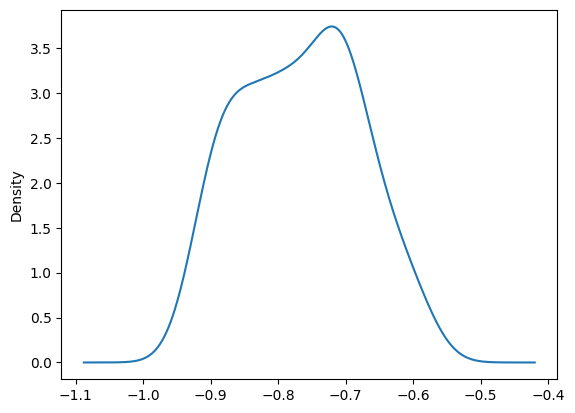

In [56]:
thetas[0]['Theta 0'].plot.kde()

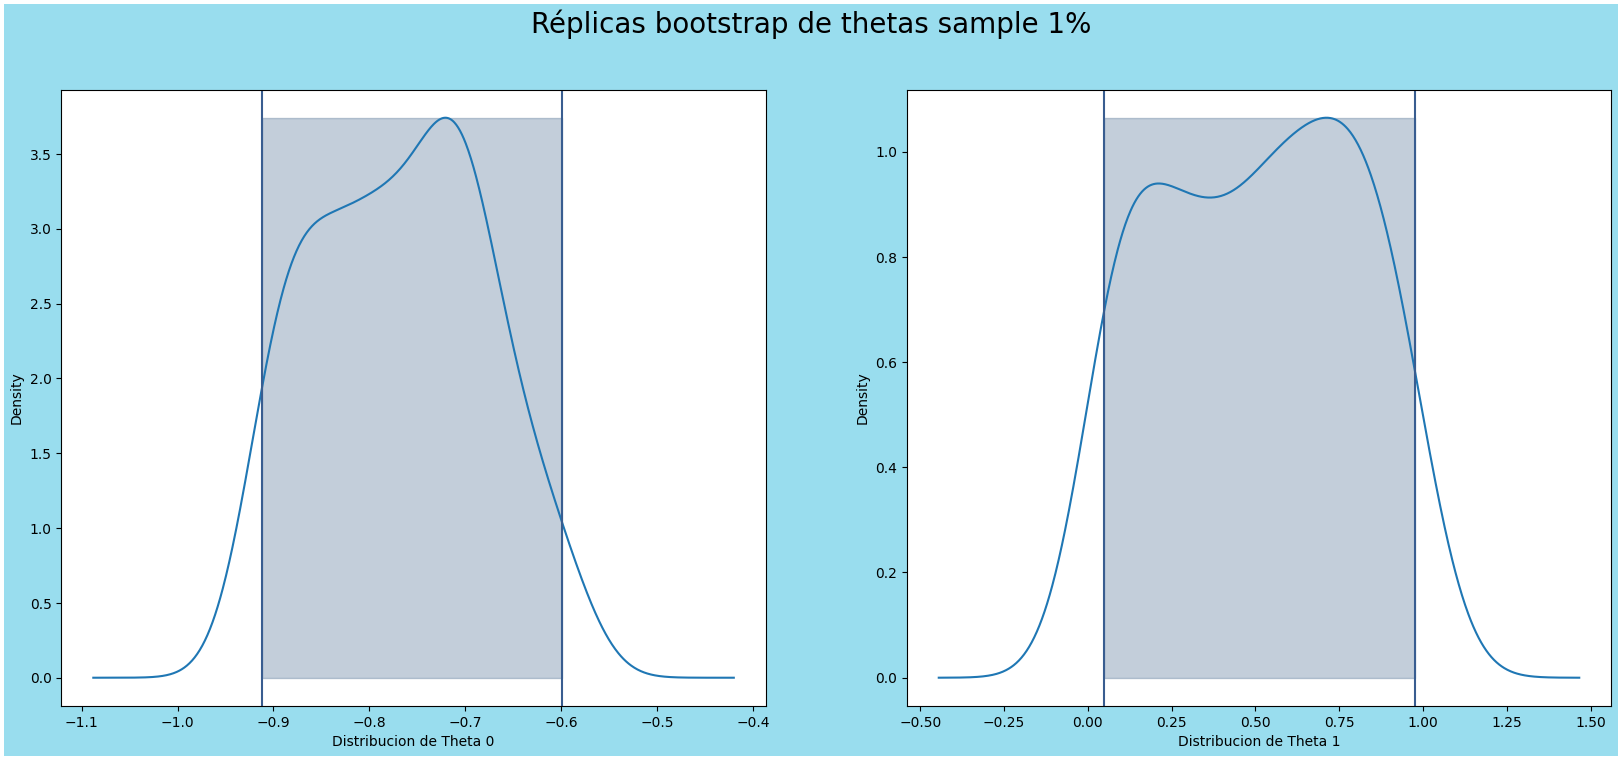

In [57]:
blue='#99ddee'
white='#ffffff'
fig, axs = plt.subplots(ncols=2, figsize=(20, 8), linewidth=5, 
                        facecolor=blue)
fig.suptitle('Réplicas bootstrap de thetas sample 1%', size=20)

cis = {'Theta 0': ci_0[0],'Theta 1': ci_1[0]}

i=0
for data in cis:
    ax = axs[i]
    i+=1
    df_samp0[data].plot.kde(ax=ax)
    ax.set_xlabel('Distribucion de '+ data)
    ax.axvline(x=cis[data][0], color='#395d90')
    ax.axvline(x=cis[data][1], color='#395d90')
    kde_data = ax.lines[0].get_xydata()
    max_value = max(kde_data[:, 1])
    ax.fill_between([cis[data][0], cis[data][1]], max_value, color='#395d85', alpha=0.3)

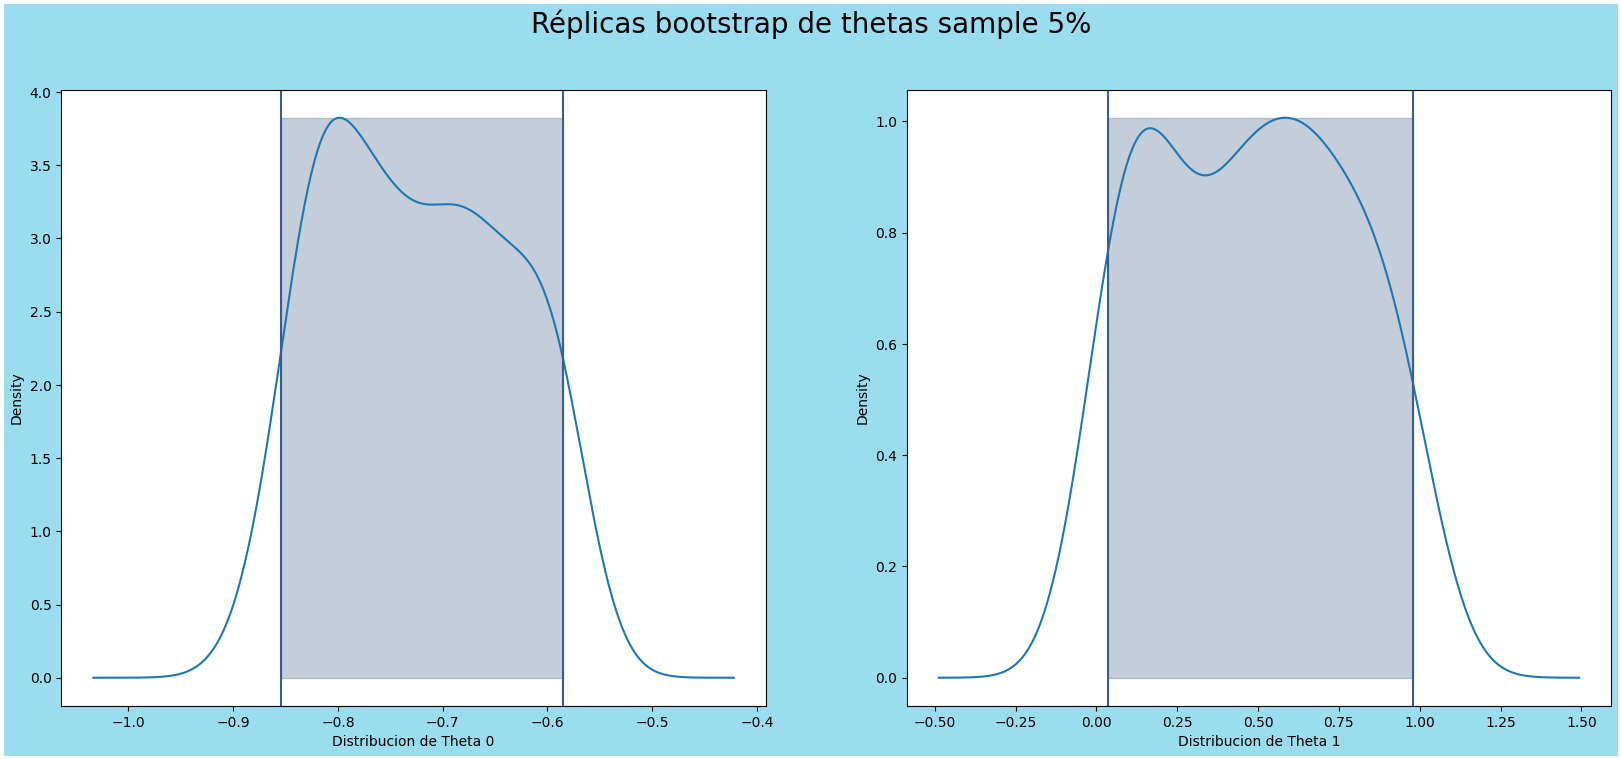

In [58]:
blue='#99ddee'
white='#ffffff'
fig, axs = plt.subplots(ncols=2, figsize=(20, 8), linewidth=5, 
                        facecolor=blue)
fig.suptitle('Réplicas bootstrap de thetas sample 5%', size=20)

cis = {'Theta 0': ci_0[1],'Theta 1': ci_1[1]}
i=0
for data in cis:
    ax = axs[i]
    i+=1
    df_samp1[data].plot.kde(ax=ax)
    ax.set_xlabel('Distribucion de '+ data)
    ax.axvline(x=cis[data][0], color='#395d90')
    ax.axvline(x=cis[data][1], color='#395d90')
    kde_data = ax.lines[0].get_xydata()
    max_value = max(kde_data[:, 1])
    ax.fill_between([cis[data][0], cis[data][1]], max_value, color='#395d85', alpha=0.3)